In [1]:
#Step 1: Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
#Step 2: Reading the data file and trying to understand it

data_file = pd.read_csv('C:\\Users\\win10\\Desktop\\Bike Sharing Assignment\\day.csv')

In [3]:
#looking at the head of the data set
data_file.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Observing the shape of the data set
data_file.shape

(730, 16)

In [5]:
#Looking at the columns description
data_file.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking for all the null values in all the columns
data_file.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#Checking all the columns
data_file.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
data_file.size

11680

In [10]:
data_file.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [11]:
#Copying data into a another variable
data_file_copy = data_file.copy()

In [12]:
data_file_copy.shape

(730, 16)

In [13]:
#Dropping duplicates
data_file_copy.drop_duplicates(inplace=True)

In [14]:
#Verifying the shape
data_file_copy.shape

(730, 16)

#### Now we know that there are no duplicates in the data set

# 3) Cleaning the data
### Dropping the folloing columns
### > instant as its just the row numbers
### > dteday as we already have columns for weekday, year, mnth etc
### > casual & registered as they are not features

In [17]:
data_file.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [18]:
data_file.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# Mappling the season number to the season name
data_file.season = data_file.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [20]:
# Mapping the months
data_file.mnth = data_file.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [21]:
# Mapping the weekdays
data_file.weekday = data_file.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [22]:
# Mapping the wearther

data_file.weathersit = data_file.weathersit.map({1:'Clear',2:'Misty',3:'Light-snowrain',4:'Heavy-snowrain'})

In [23]:
data_file.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# 4) Visualising the data
#### By looking at the catogorical columns predictor in comparison to target variable

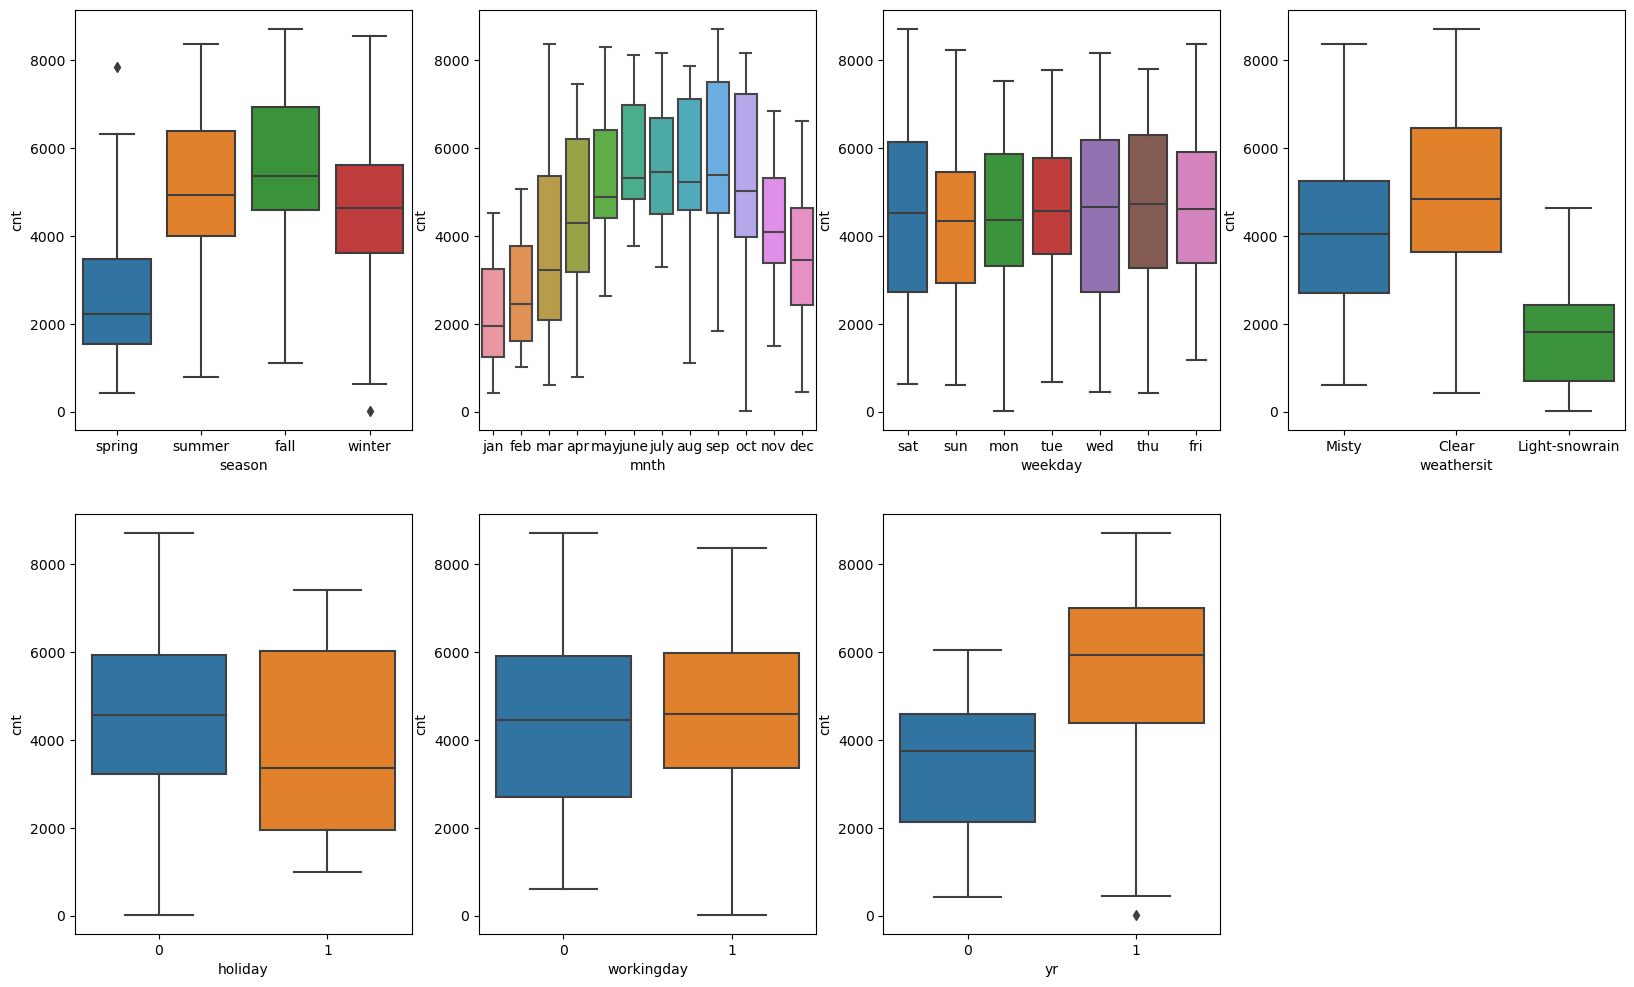

In [26]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x= 'season', y = 'cnt', data = data_file)
plt.subplot(2,4,2)
sns.boxplot(x= 'mnth', y = 'cnt', data = data_file)
plt.subplot(2,4,3)
sns.boxplot(x= 'weekday', y = 'cnt', data = data_file)
plt.subplot(2,4,4)
sns.boxplot(x= 'weathersit', y = 'cnt', data = data_file)
plt.subplot(2,4,5)
sns.boxplot(x= 'holiday', y = 'cnt', data = data_file)
plt.subplot(2,4,6)
sns.boxplot(x= 'workingday', y = 'cnt', data = data_file)
plt.subplot(2,4,7)
sns.boxplot(x= 'yr', y = 'cnt', data = data_file)
plt.show()

In [27]:
# writing a function to create barplot related to the catagorical columns
def bar_plot(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt', data=data_file)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt', data=data_file, hue='yr',palette='Set1')
    plt.legend(labels=['2018','2019'])
    plt.show()

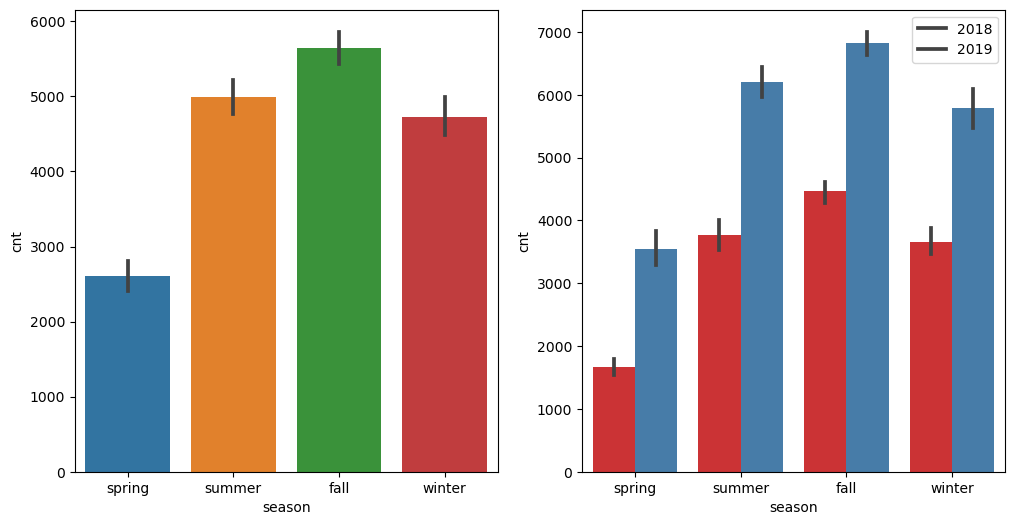

In [28]:
# plotting season column
bar_plot('season')

#### Observation: We see more bookings in fall, and the overveall bookings have increased from 2018 to 2019

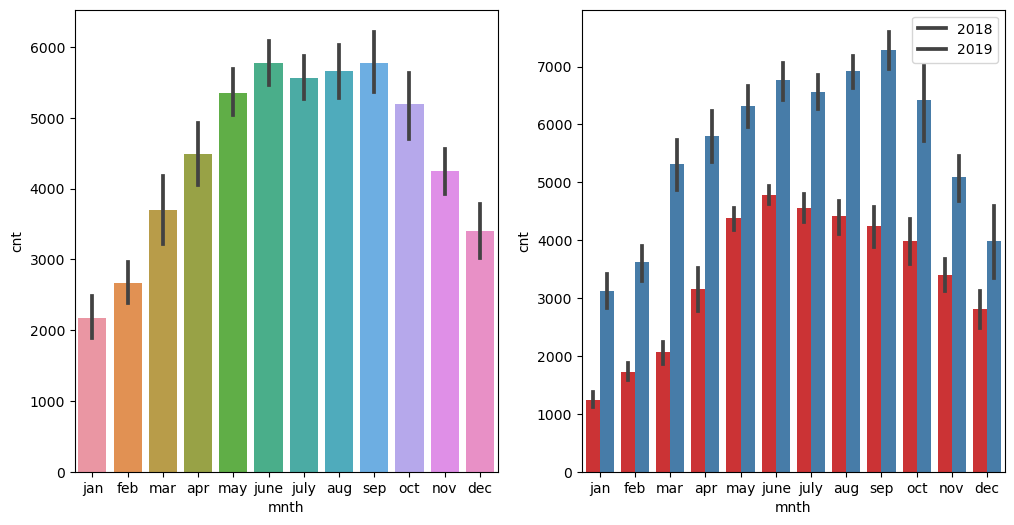

In [30]:
# plotting mnth column
bar_plot('mnth')

#### Observation: We see more bookings from May-October, Number of booking increased from 2018 to 2019

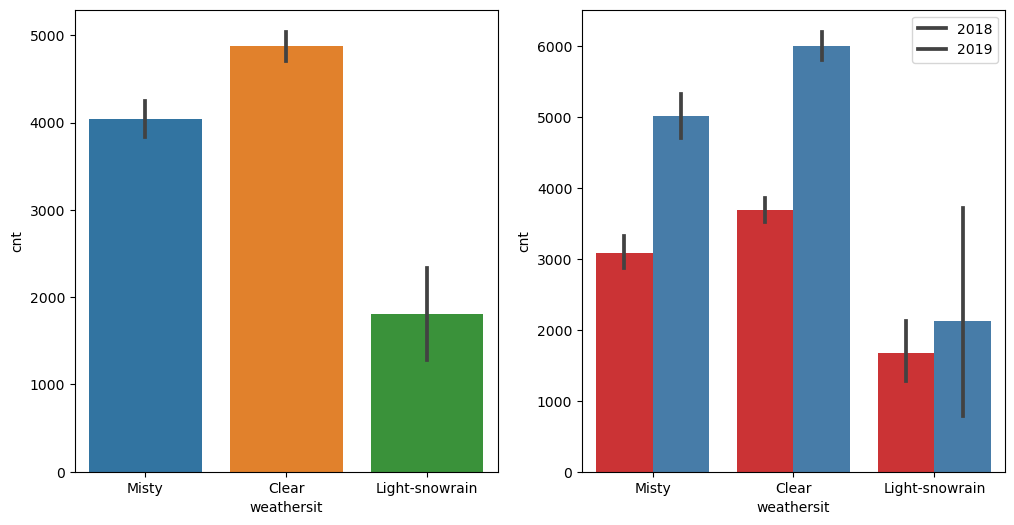

In [32]:
# plotting weathersit column
bar_plot('weathersit')

#### Observations: We see that Clear weather conditions attactract more bookings. We also see that booking increases for all weathers from 2018 to 2019

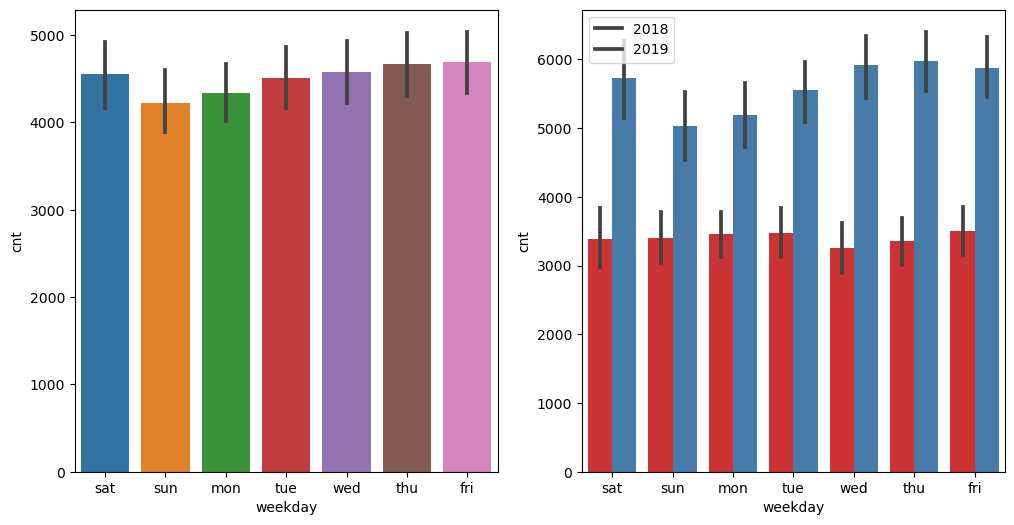

In [34]:
# plotting weekday column
bar_plot('weekday')

#### Observations: We see more booking from Thursday-Sunday

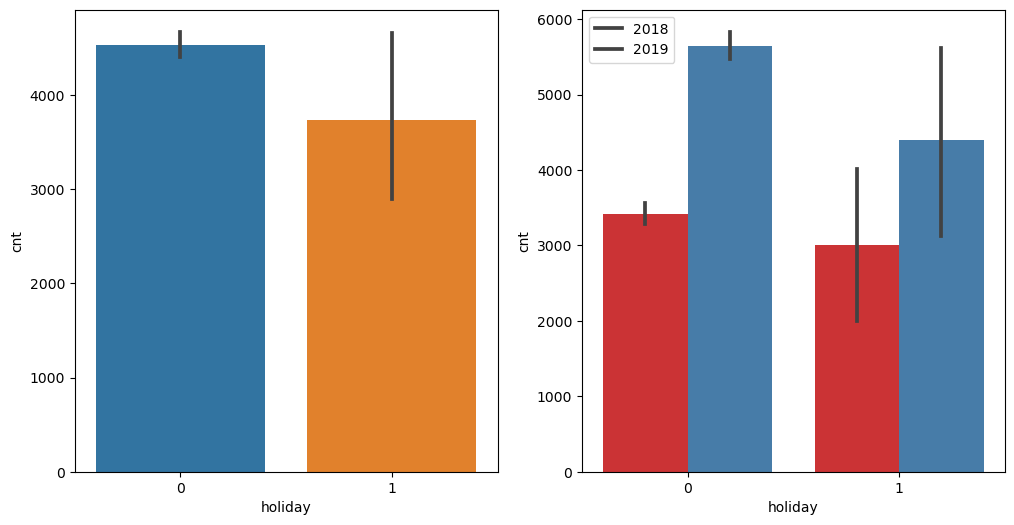

In [36]:
# plotting holiday column
bar_plot('holiday')

#### Observation: We see more bookings on non-holidays as people prefer to stay at home on holidays

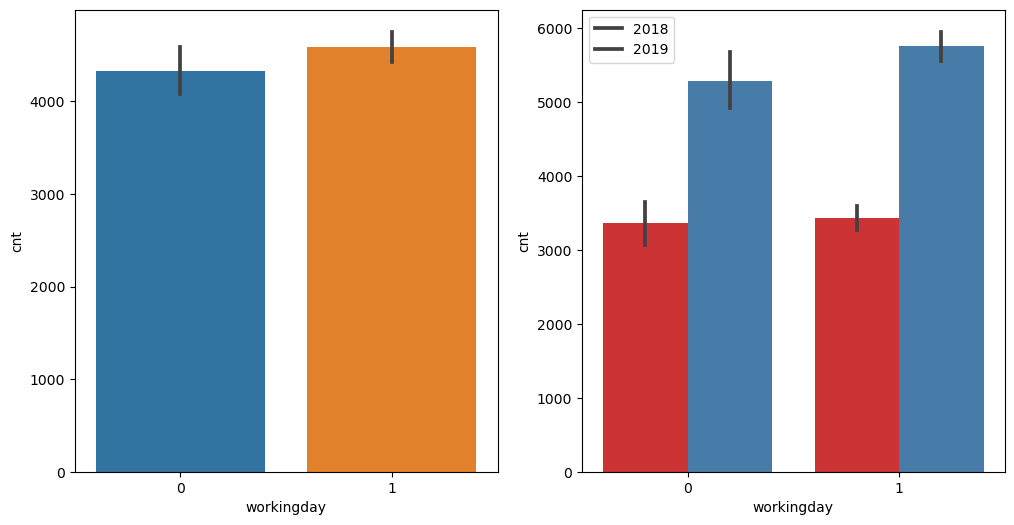

In [40]:
# plotting workingday column
bar_plot('workingday')

#### Observations the over all booking increased from 2018 to 2019 Booking seems to be same as in working or non working day

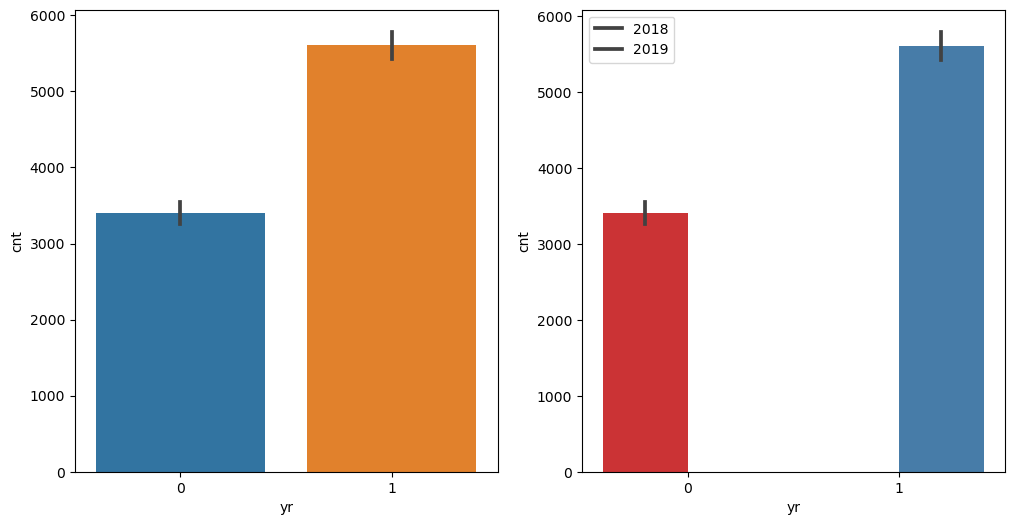

In [42]:
# plotting yr column
bar_plot('yr')

#### Observation: we saw more bookings in 2019 as compared to 2018

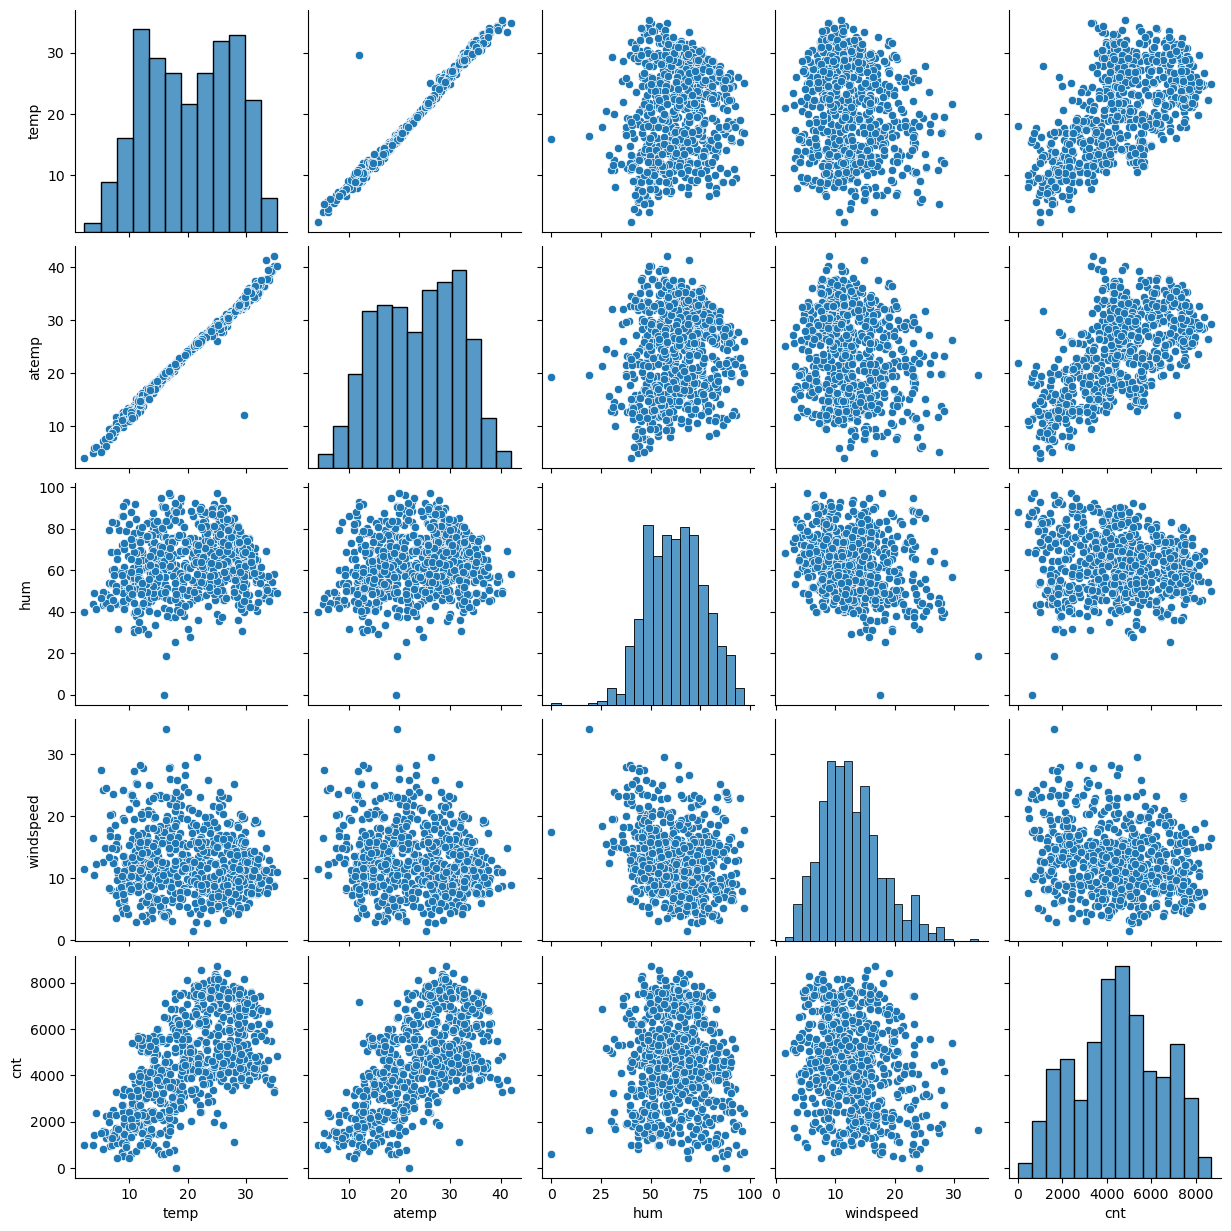

In [44]:
# plotting the numerical columns
sns.pairplot(data=data_file,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

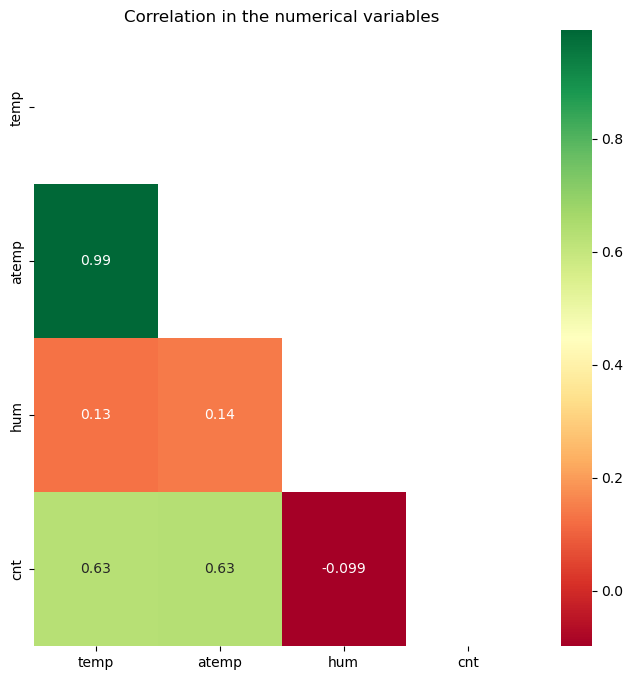

In [45]:
# Checking the correlation in the numerical variables

plt.figure(figsize = (8,8))
matrix= np.triu(data_file[['temp','atemp','hum','cnt']].corr())
sns.heatmap(data_file[['temp','atemp','hum','cnt']].corr(), annot=True, cmap='RdYlGn',mask=matrix)
plt.title('Correlation in the numerical variables')
plt.show()

#### Observation: There is a linear relationship between temp and atemp. So they cannnot be used in the model because of multicolinearity. Lets decide the parameters to keep based on VIF and p-value

In [47]:
# 5) Prepping the data
# Creating variables for mnth, weekday, weathersit & season

mnth_1 = pd.get_dummies(data_file.mnth, drop_first=True)
week_1 =pd.get_dummies(data_file.weekday, drop_first=True)
weath_1 =pd.get_dummies(data_file.weathersit, drop_first=True)
season_1 =pd.get_dummies(data_file.season, drop_first=True)

In [48]:
data_file.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [49]:
# merging the variables created above with the data set
data_file1 = pd.concat([data_file, mnth_1,week_1,weath_1,season_1], axis=1)

In [50]:
data_file1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light-snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [51]:
data_file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [52]:
# As we have already merged the original data set with the variables created
# lets drop the unnecessary columns
data_file1.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)

In [53]:
data_file1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light-snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [54]:
data_file1.shape

(730, 30)

In [55]:
data_file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

# 6) Now we need to split the data into Training and Testing set 70:30 split

In [57]:
np.random.seed(0)
train1, test1 = train_test_split(data_file1, train_size= 0.7, random_state=100)

In [58]:
train1.shape

(510, 30)

In [59]:
test1.shape

(220, 30)

In [60]:
# Rescaling the features
scaler = MinMaxScaler()

In [61]:
train1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light-snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [62]:
vars1 =['temp','atemp','hum','windspeed','cnt']
train1[vars1]=scaler.fit_transform(train1[vars1])

In [63]:
train1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light-snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [64]:
train1.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light-snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


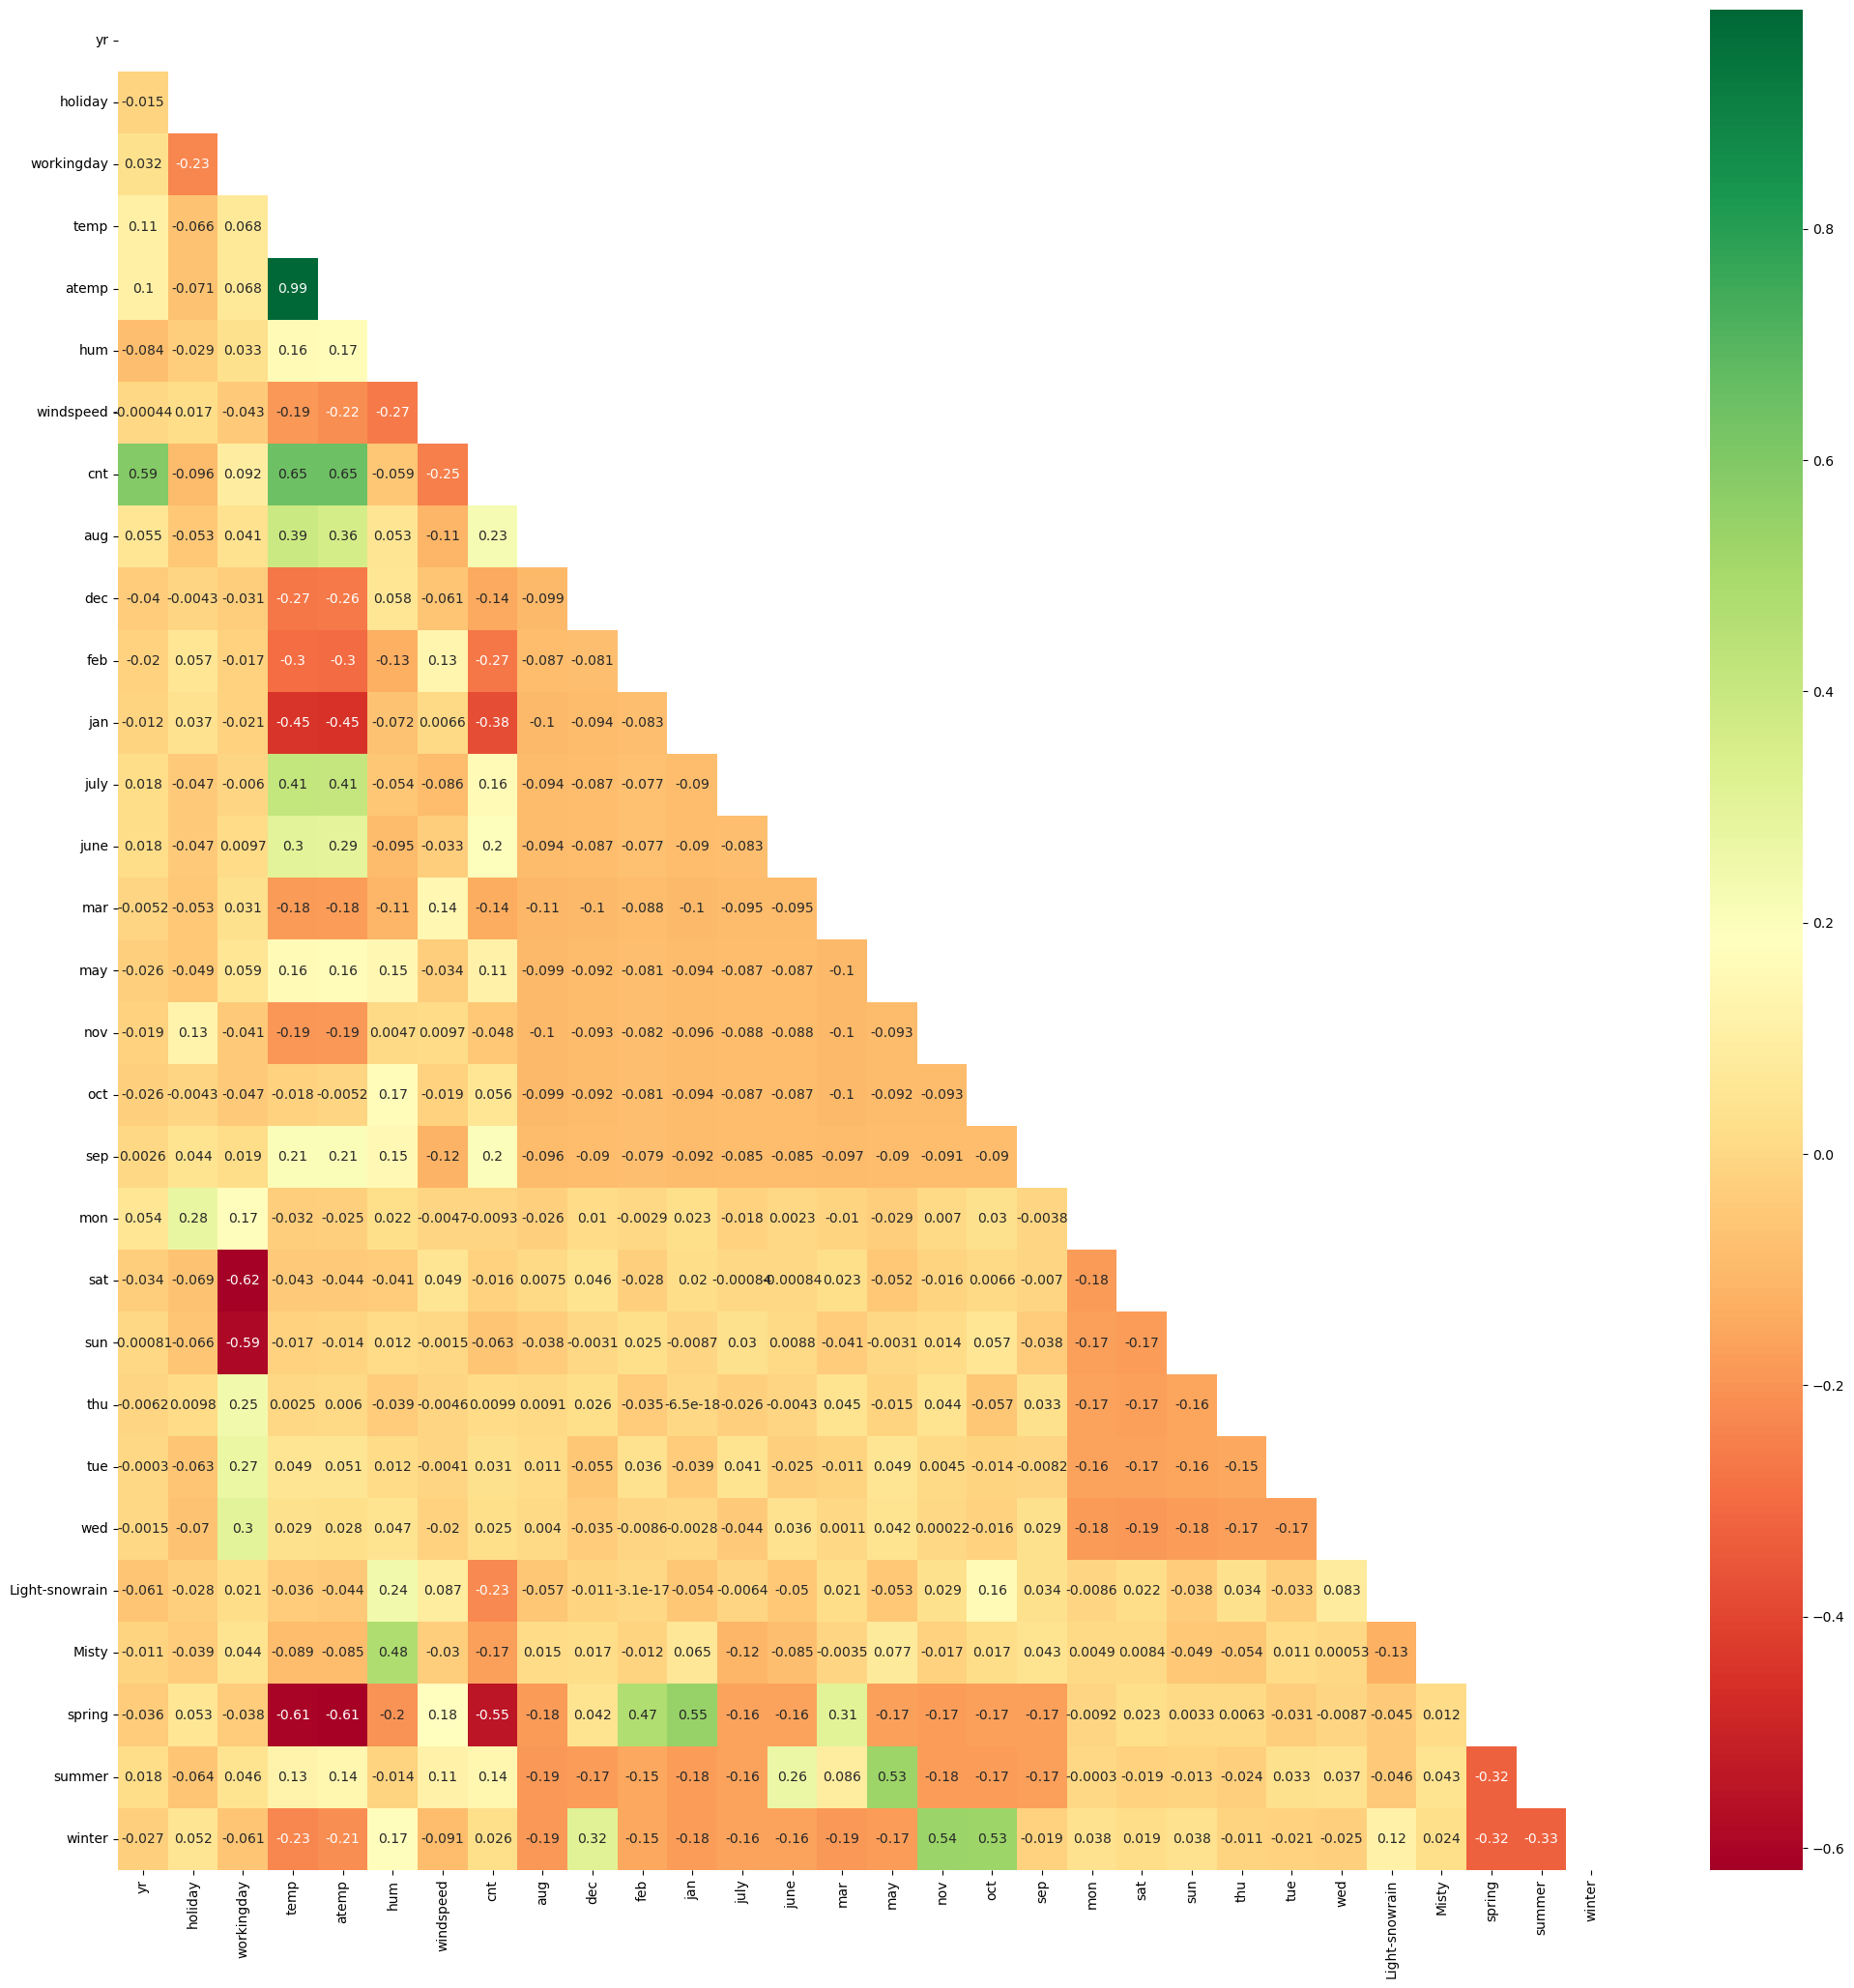

In [65]:
# looking for highly correlated variables

plt.figure(figsize = (25,25))
matrix = np.triu(train1.corr())
sns.heatmap(train1.corr(), annot=True, cmap='RdYlGn', mask=matrix)
plt.show()

#### Observation: cnt has correlation with yr and temp. Misty and hum show correlation. Spring with Jan and Feb, Summer with May, Winter with Oct and Nov show correlation

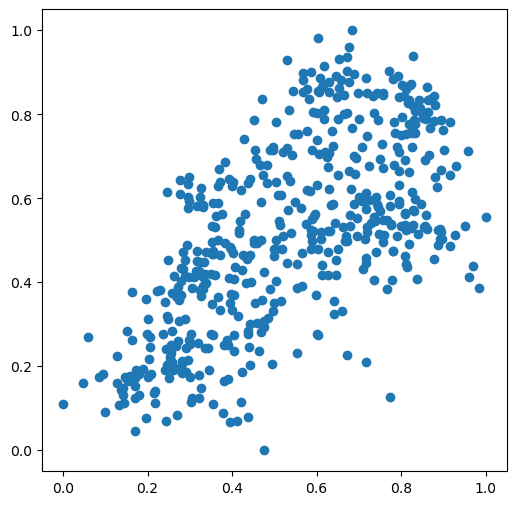

In [67]:
# Scatter plot of temp vs cnt
plt.figure(figsize=[6,6])
plt.scatter(train1.temp, train1.cnt)
plt.show()

#### Observation: This confirms the correlation between temp and cnt

In [69]:
# Now building the Linear Model
train_y= train1.pop('cnt')
train_x= train1

In [70]:
#Eliminating recursive features
lr = LinearRegression()
lr.fit(train_x,train_y)

rfe1= RFE(lr, n_features_to_select=15)
rfe1= rfe1.fit(train_x,train_y)

In [71]:
#listing the variables
list(zip(train_x.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 11),
 ('wed', False, 14),
 ('Light-snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [72]:
col = train_x.columns[rfe1.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'july',
       'sep', 'sat', 'sun', 'Light-snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [73]:
#lets see which columns were rejected

train_x.columns[~rfe1.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [74]:
# Function to calculate VIF for variables

def calVIF(data_1):
    vif= pd.DataFrame()
    vif['Features'] = data_1.columns
    vif['VIF'] = [variance_inflation_factor(data_1.values,i) for i in range(data_1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [75]:
rfe_train = train_x[col]

In [76]:
#Calculating the VIF
calVIF(rfe_train)

,Features,VIF
2,workingday,50.68
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,hum,1.91
11,Misty,1.57


### workingday shows high VIF

In [78]:
# Building the 1st Linear regression model(LRM)
train_lrm = sm.add_constant(rfe_train)
lrm_1= sm.OLS(train_y,train_lrm).fit()
print(lrm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.11e-191
Time:                        20:09:03   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.

In [79]:
# Lets check the correlation of different features by RFE
#plt.figure(figsize=(15,10))
#sns.heatmap()

In [80]:
# Dropping workingday as it shows high VIF value
train_new = rfe_train.drop(['workingday'], axis=1)

In [81]:
calVIF(train_new)

,Features,VIF
3,hum,28.25
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.36
12,summer,2.79
10,Misty,2.30
0,yr,2.08
5,july,1.59
6,sep,1.39


In [82]:
# Dropping hum as it shows high VIF value
train_new = train_new.drop(['hum'], axis=1)

In [83]:
calVIF(train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.63
11,summer,2.24
10,spring,2.13
0,yr,2.07
12,winter,1.84
4,july,1.59
9,Misty,1.56
5,sep,1.34
6,sat,1.23


In [84]:
# 2nd LRM
train_lrm2 = sm.add_constant(train_new)
lrm_2= sm.OLS(train_y,train_lrm2).fit()
print(lrm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.28e-188
Time:                        20:09:08   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2037      0.029      6.

In [85]:
# We can drop sat as it has high p-value
train_new = train_new.drop(['sat'], axis=1)
calVIF(train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,yr,2.07
11,winter,1.81
4,july,1.59
8,Misty,1.56
5,sep,1.34
6,sun,1.18


In [86]:
# 3rd LRM
train_lrm3 = sm.add_constant(train_new)
lrm_3= sm.OLS(train_y,train_lrm3).fit()
print(lrm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.45e-189
Time:                        20:09:09   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2060      0.029      7.

In [87]:
# We can drop hum as it has high VIF
#train_new = train_new.drop(['hum'], axis=1)
calVIF(train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,yr,2.07
11,winter,1.81
4,july,1.59
8,Misty,1.56
5,sep,1.34
6,sun,1.18


In [88]:
# 4rd LRM
train_lrm4 = sm.add_constant(train_new)
lrm_4= sm.OLS(train_y,train_lrm4).fit()
print(lrm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.45e-189
Time:                        20:09:10   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2060      0.029      7.

In [89]:
# We can drop holiday as it has high p-value
#train_new = train_new.drop(['holiday'], axis=1)
#calVIF(train_new)

In [90]:
# 5th LRM
#train_lrm5 = sm.add_constant(train_new)
#lrm_5= sm.OLS(train_y,train_lrm5).fit()
#print(lrm_5.summary())

In [91]:
# We can drop sun as it has high p-value
#train_new = train_new.drop(['sun'], axis=1)
#calVIF(train_new)

In [92]:
# 6th LRM
#train_lrm6 = sm.add_constant(train_new)
#lrm_6= sm.OLS(train_y,train_lrm6).fit()
#print(lrm_6.summary())

In [93]:
lrm_4.params

const             0.206034
yr                0.233472
holiday          -0.105201
temp              0.490684
windspeed        -0.147854
july             -0.049235
sep               0.076013
sun              -0.048345
Light-snowrain   -0.289492
Misty            -0.082198
spring           -0.065521
summer            0.047536
winter            0.084806
dtype: float64

In [94]:
# Residual analysis
train_lrm4

,const,yr,holiday,temp,windspeed,july,sep,sun,Light-snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,1,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,1,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,0,1,0,1,0


In [95]:
trainY_pred = lrm_4.predict(train_lrm4)

C:\Users\win10\AppData\Local\Temp\ipykernel_8548\1580363566.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((train_y,trainY_pred), bins=20)


Text(0.5, 0, 'Errors')

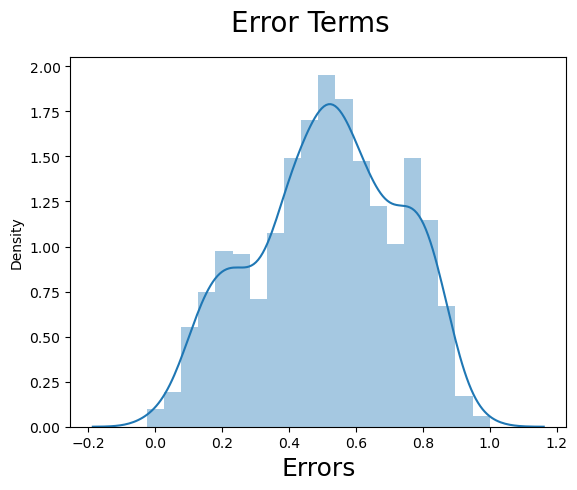

In [96]:
#Normality of error terms
# Plotting the histograms of error terms

fig= plt.figure()
sns.distplot((train_y,trainY_pred), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

In [97]:
calVIF(train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,yr,2.07
11,winter,1.81
4,july,1.59
8,Misty,1.56
5,sep,1.34
6,sun,1.18


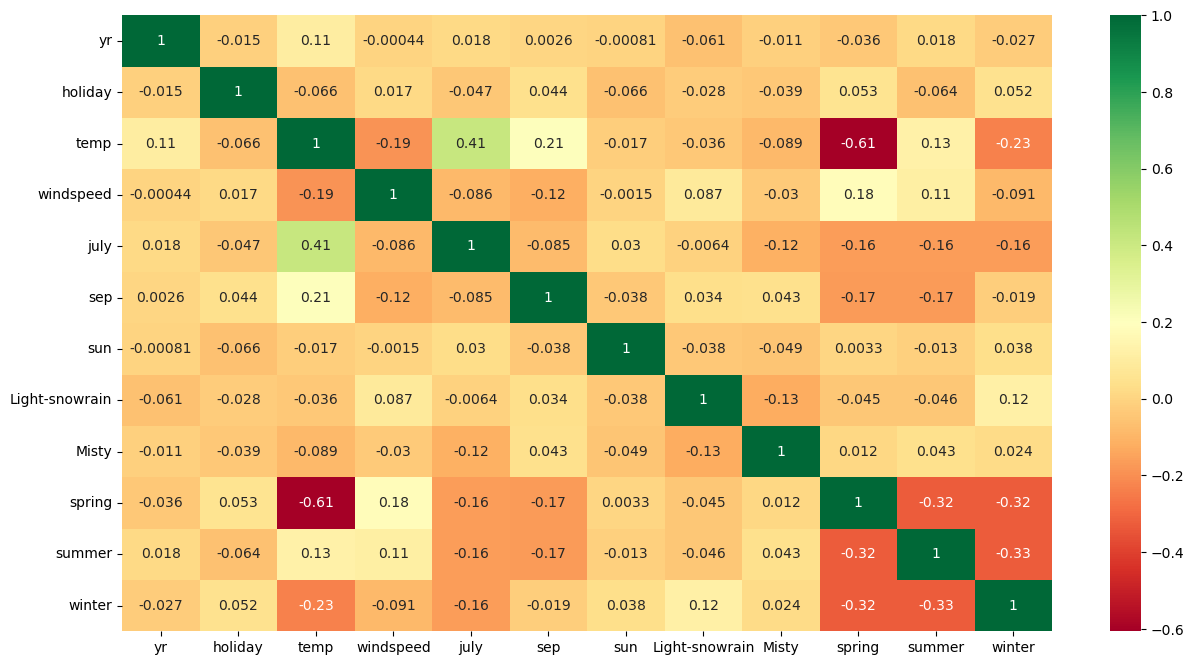

In [98]:
plt.figure(figsize=(15,8))
sns.heatmap(train_new.corr(), annot=True, cmap='RdYlGn')
plt.show()

### With low VIF value and no multicolinearity is good

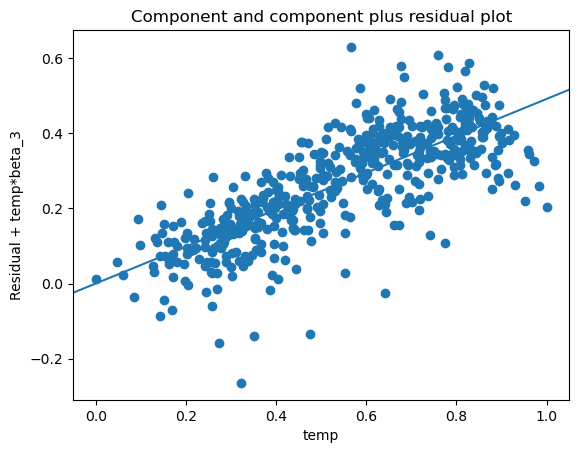

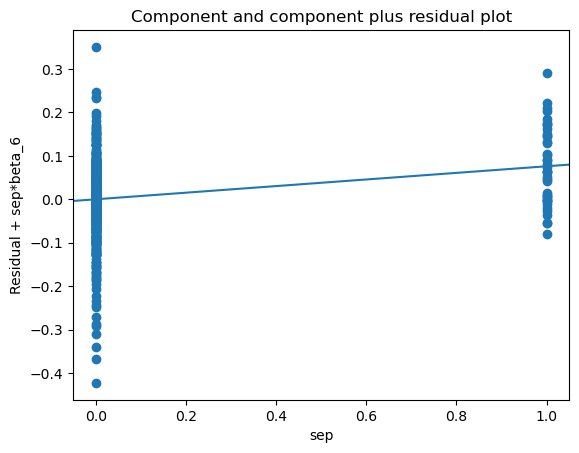

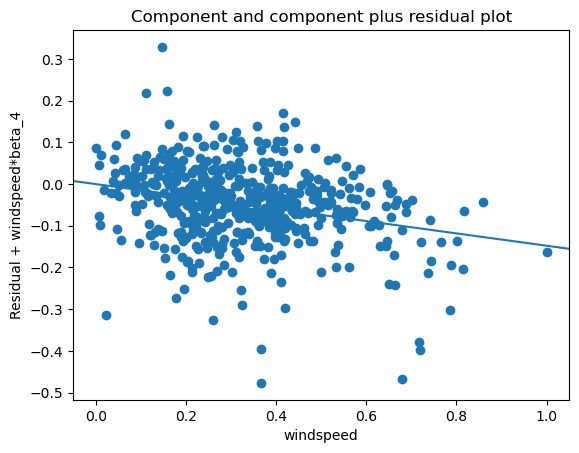

In [100]:
#Linearity 
sm.graphics.plot_ccpr(lrm_4, 'temp')
plt.show()

sm.graphics.plot_ccpr(lrm_4, 'sep')
plt.show()

sm.graphics.plot_ccpr(lrm_4, 'windspeed')
plt.show()

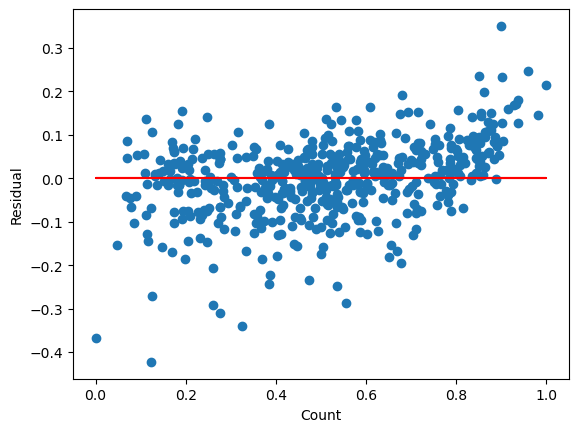

In [102]:
#Homoscedasticity

residual = train_y - trainY_pred
fig= plt.figure()
plt.scatter(train_y,residual)
plt.plot(train_y,(train_y-train_y),'-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### No visible pattern observed

### Independence of residuals
##### Durbin-Watson value for the final model is lrm_4 is 2.069, which signifies there is no autocorrelation.

# Making predictions based on the final model
#### We now a final model and checked for the normality errors, its time to go ahead and make predictions using the final,4th Model

In [106]:
#Applying scaling on the test dataset

num_vars = ['temp','atemp','hum','windspeed','cnt']
test1[num_vars] = scaler.transform(test1[num_vars])
test1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light-snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [107]:
test1.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light-snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
testY = test1.pop('cnt')
testX = test1

In [109]:
col1 = train_new.columns

testX= testX[col1]

# Adding constant variable to testX
testX_lrm_4 = sm.add_constant(testX)

In [110]:
y_pred = lrm_4.predict(testX_lrm_4)

In [111]:
r2 = r2_score(testY, y_pred)
round(r2,4)

0.808

# Model Evaluation
### Plotting the graph for actual vs predicted values 

Text(0, 0.5, 'y_pred')

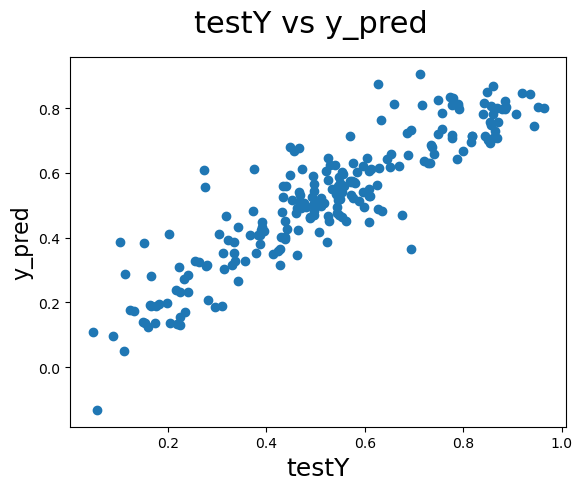

In [114]:
# Plotting testY and y_pred to understand the spread

fig = plt.figure()
plt.scatter(testY, y_pred)
fig.suptitle('testY vs y_pred', fontsize =22)
plt.xlabel('testY', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [115]:
round(lrm_4.params,4)

const             0.2060
yr                0.2335
holiday          -0.1052
temp              0.4907
windspeed        -0.1479
july             -0.0492
sep               0.0760
sun              -0.0483
Light-snowrain   -0.2895
Misty            -0.0822
spring           -0.0655
summer            0.0475
winter            0.0848
dtype: float64

In [118]:
# Calculating the Adjusted R Square value of the test dataset
r2_adjusted = round(1-(1-r2)*(testX.shape[0]-1)/(testX.shape[0]-testX.shape[1]-1),4)
print(r2_adjusted)

0.7968


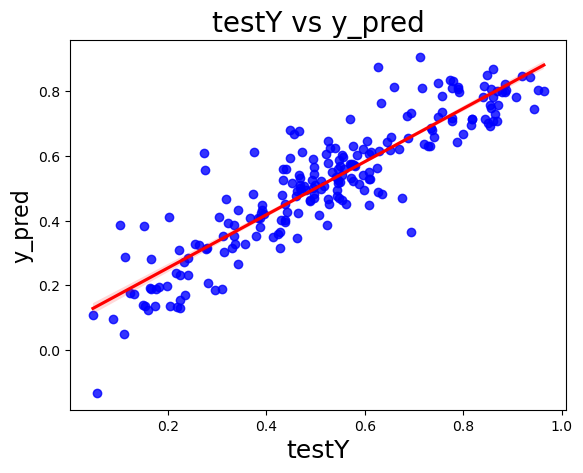

In [119]:
#Now lets see if fit in the test data
#Regression plot
plt.figure()
sns.regplot(x=testY, y=y_pred, ci=68, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('testY vs y_pred', fontsize=20)
plt.xlabel("testY", fontsize=18)
plt.ylabel("y_pred", fontsize=16)
plt.show()

# Comparing the test and training data outputs

### > Training data R^2         : 0.841
### > Test data R^2             : 0.808
### > Training data Adjusted R^2: 0.837
### > Test data Adjusted R^2    : 0.7968 

# Conclusion: 
#### The demand for bikes depends on year, holiday, temp, windspeed, sept, Light_snowrain, Misty, spring, summer and winter data